# configuration

In [4]:

# common standard libraries
import datetime
import time
import os
# common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit learn
import requests
from bs4 import BeautifulSoup
# visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# setting plot appearance
# see here for more options: https://matplotlib.org/customization.html

%config InlineBackend.figure_format ='retina'
sns.set() # this reverts to matploiulib default
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style('darkgrid')

#ignoire warnings(dont display stderr)

import warnings
warnings.filterwarnings('ignore')


In [5]:
# loading data set

In [6]:
from sklearn import datasets
boston = datasets.load_boston()

In [7]:
from sklearn.utils import Bunch

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# loading the data into a dataframe
df = pd.DataFrame(data = boston['data'],columns= boston['feature_names'])

In [17]:
# adding the taret variables
df['MEDV']= boston['target']

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
# the target var could be moved the start of the data frame like so

y = df['MEDV'].copy()

In [20]:
del df['MEDV']

In [21]:
df = pd.concat((y, df), axis = 1)

# looking for patterns in the data set

# pairwise correlation

In [83]:
# pairwise correlation for the selected colulmns
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


# VISUALISATION

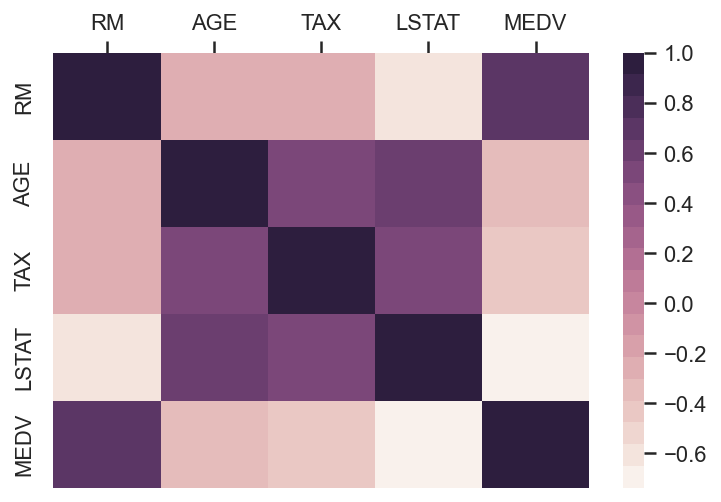

In [85]:
%matplotlib inline
ax= sns.heatmap(df[cols].corr(), cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15)) # cubehelix_palette this overides the default custom colors
ax.xaxis.tick_top() # move labels to the top

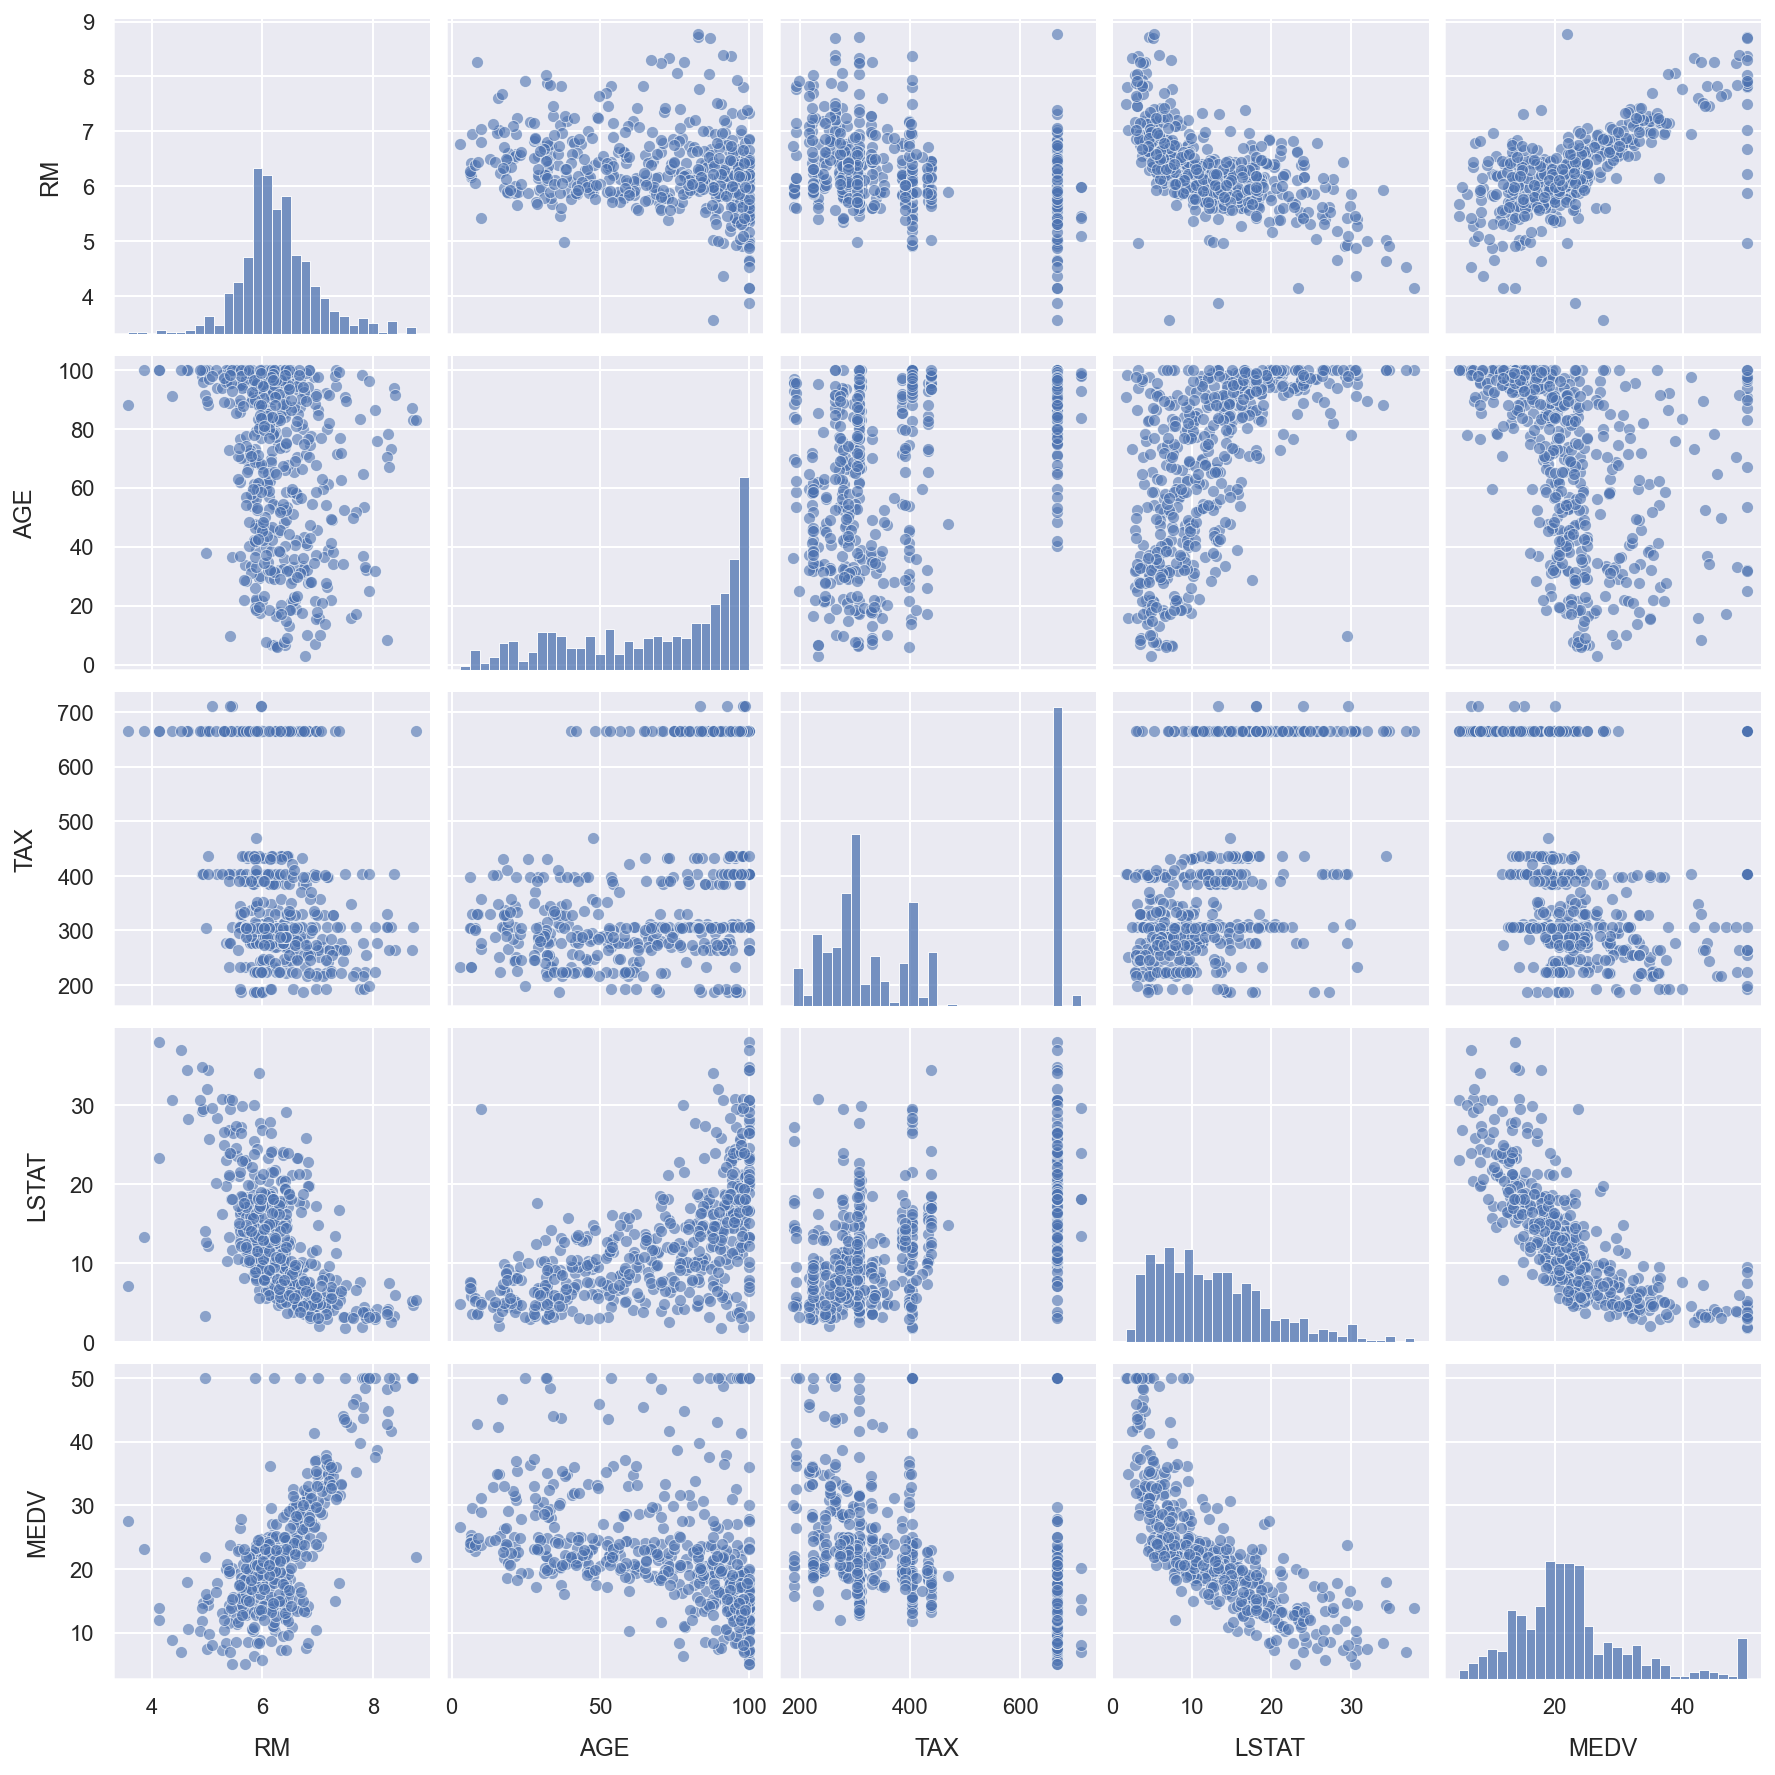

In [86]:
# visualise data using seaborns pairplot function
sns.pairplot(df[cols],
            plot_kws={'alpha': 0.6},
            diag_kws ={'bins':30})

In [ ]:
# REGRESSION USING SCIKIT-LEARN

In [ ]:
# DEFINE A FUNCTION THAT  THAT CALCULATES THE LINE OF BEST FIT, MEAN SQUARED ARROR

# MSE of Linear Model

PREDICTING MEDV

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(df, feature, target = "MEDV"):
    # get x, y to model
    y =df[target].values
    x = df[feature].values.reshape(-1,1) # only reshape (-1,1) when modelling 1Dimensional feature
    print('{} ~ {}'.format(target, feature))
  
    # build and fit the model
    lm = LinearRegression()
    lm.fit(x,y)
    msg = 'model: y = {:.3f} + {:.3f}x'.format(lm.intercept_, lm.coef_[0]) # this is the fitted model
    print(msg)
    # predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [89]:
# call get_mse for both RM and LSTAT as predictors
get_mse(df, 'RM')

MEDV ~ RM
model: y = -34.671 + 9.102x
mse = 43.60



In [90]:
get_mse(df, 'LSTAT')

MEDV ~ LSTAT
model: y = 34.554 + -0.950x
mse = 38.48



# POLYNOMIAL

looking back at the plot, it appears as if LSTAT would better fit a polynomial

In [131]:
# pulling out our independent variable and target varaibels

y = df['MEDV']
x = df['LSTAT'].values.reshape(-1,1)
print('x=')
print(x[:3], '...etc') # print the 1st three rows

x=
[[4.98]
 [9.14]
 [4.03]] ...etc


In [132]:
# importing transformation tool from scikit-learn
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

In [133]:
x_poly = poly.fit_transform(x)


In [134]:
# print the firts three obs
print('x_poly')
print(x_poly[:3], 'etc')

x_poly
[[  1.         4.98      24.8004   123.505992]
 [  1.         9.14      83.5396   763.551944]
 [  1.         4.03      16.2409    65.450827]] etc


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf = LinearRegression()
clf.fit(x_poly, y)
x_0 = clf.intercept_ + clf.coef_[0]  # intercept

x_1, x_2, x_3 = clf.coef_[1:]   # other coefficients

msg = 'model: y = {:.3f} + {:.3f}x +{:.3f}x^2 {:.3f}x^3'.format(x_0, x_1,x_2, x_3)

print(msg)


model: y = 48.650 + -3.866x +0.149x^2 -0.002x^3


In [136]:
# make a prediction
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred
print('Residuals = ')
print(resid_MEDV)

Residuals = 
0      -8.840257
1      -2.613603
2      -0.655778
3      -5.119496
4       4.231912
         ...    
501    -0.965755
502    -3.712873
503    -7.319487
504    -7.300924
505   -14.544081
Name: MEDV, Length: 506, dtype: float64


In [137]:
error = mean_squared_error(y, y_pred)
print('mse = {:.2f}'.format(error))

mse = 28.88


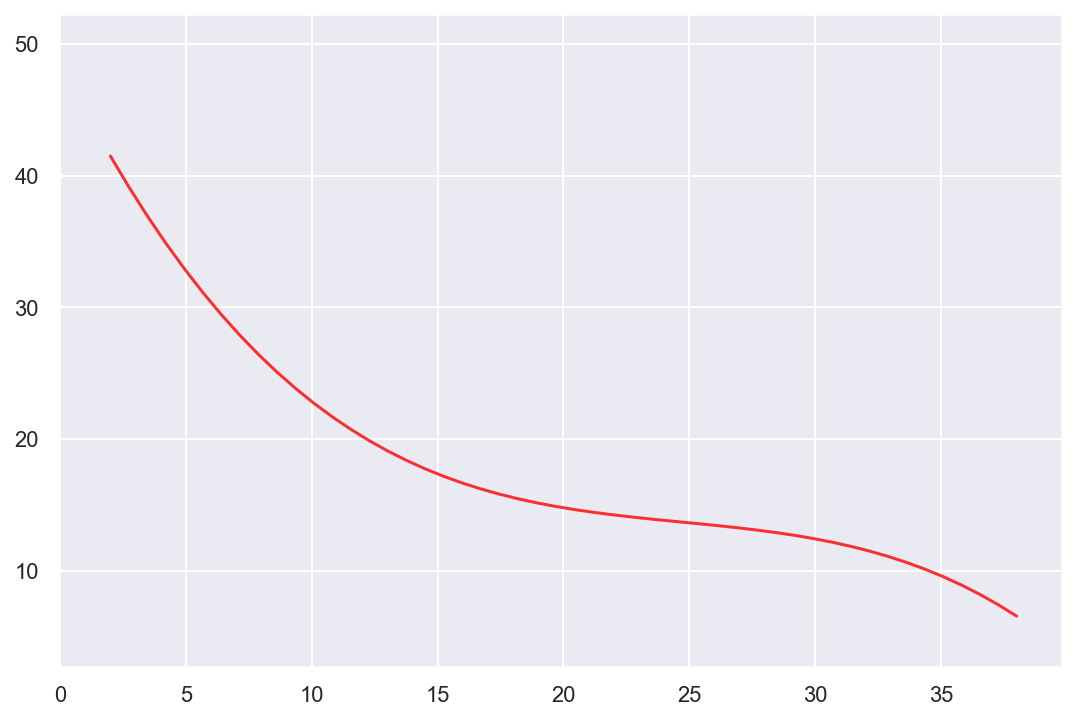

In [138]:
# we can then plot the polynomil model
fig, ax = plt.subplots()

# plot the sample

ax.scatter(x.flatten(),y, alpha = 0)

# plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1) # this creates a creates sequences of evenly spaced numbers
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color = 'red', alpha = 0.8)


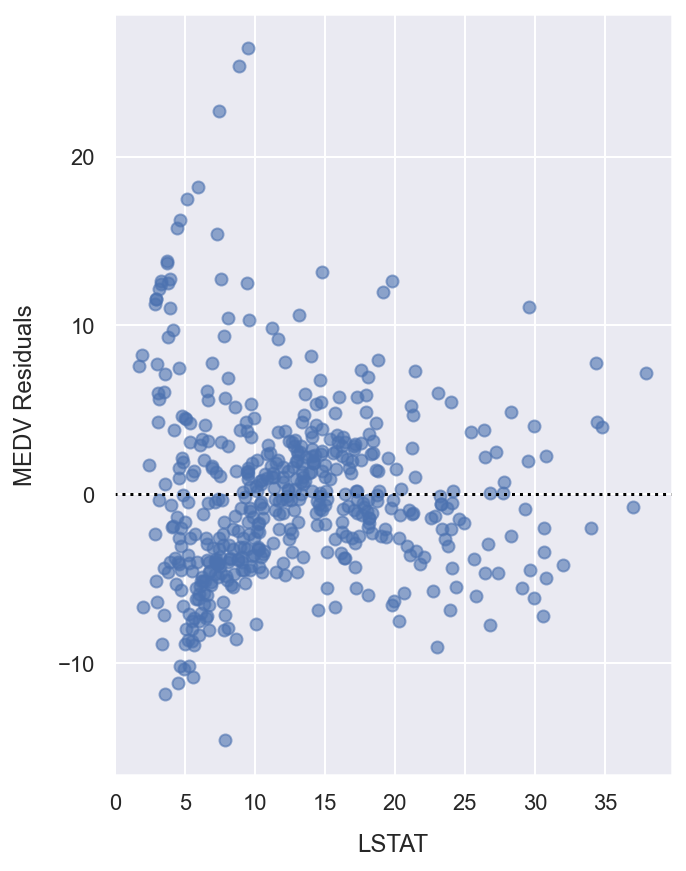

In [144]:
# plol residuals vs fitted value

fig, ax = plt.subplots(figsize = (5,7))
ax.scatter(x, resid_MEDV, alpha = 0.6)
ax.set_xlabel('LSTAT')
#ax.set_ylabel('MEDV Residuals $(y-\hat{y})$')
ax.set_ylabel('MEDV Residuals')
plt.axhline(0,color = 'black', ls = 'dotted')


# CREATING CATEGORICAL VARIABLES FROM CONTINUOUS  VARIABLE


In [150]:
def get_age_category(x):
    if x < 50 :
        return 'Relatively new'
    elif 50 <= x <=85:
        return 'Relatively old'
    else: 
        return 'very old'
    
df['Age_category'] = df.AGE.apply(get_age_category)

In [151]:
# check the segmented counts
df.groupby('Age_category').size()

Age_category
Relatively new    147
Relatively old    149
very old          210
dtype: int64

# REGULARISATION  METHODS REDUCE OVERFILLING

VALIDATION IS USED FOR TUNING VARIABLES(HYPARAMETERS) WHICH CONTROLS HOW  THE MODEL IS LEARNED- MODEL IS TUNED ON THE 
VALIDATION SET AND TESTED ON THE TEST SET(REAL WORLD SCENARIO)

CROSS VALIDATION IS IS USED WHEN DATA IS SCARED- HERE TRAINING SET IS PARTITIONED. THE ALGORITHM ISTRAINED USING ALL NUT ONE OF THE 
PARTITIONS AND TESTED ON THE REMAINING PARTITION. THE PARTITIONS ARE THN ROTATED SEVERAL; TIMES SO THAT THE ALGORITHM 
IS TRAINIED  AND EVALUATED ON AL;L OF THE DATA. CROSS VALIDATIONS COULD BE IN PARTITIONS OF FOLDS
CROSS VALIDATION PROVIDES A MORE ACCURATE ESTIMATES OF THE MODELS PERFORMANCE

DIFFERENT PERFORMANCE MATRICES ARE USED TO MEASURE PREDICTION ERRORS

THERE ARE TWO SOUCES OF ERROR - BIAS AND VARIANCE

A MODEL WITH A HIGHT BIASE WILL WILL PRODUCE SIMILAR ERRORS FOR A INPUT REGARDLESS OF THE TRAININD DATA THAT WAS USED

A MODEL WITH A HIGH VARIANCE WILL PROUCE DIFFERENT ERRORS FOR AN INPUT DEPENDING ON THE TRAINING DATA USED

A MODE WITH HIGH BIASE IS INFLEXIBLE  WHILE A MODEL WITH HIGH VARIANCE IS SO FLEXIBLE THAT IT WILL MODEL NOISE IN THE DATA

THAT IS A MODEL WITH HIGH VARIANCE OVERFITS THE DATA AND A MODEL WITH HIGH BIASE UNDERFITS THE DATA

MODELS MUST BALANCE THE BIASE-VARIANCE TRADEOFFS



In [ ]:
SCIKIT LEARN HAS ALGOIRITHMS FOR REGRESSION, CLASSIFICATION AND CLUSTERING, DIMENSEN REDUCTION
SCIKIT LEARN IS GOOD FOR EXPERIMENTING WITH DIFFERENT ALGORITHMS


In [152]:
sklearn.__version__

'0.24.2'

# scikit learn -unit test

In [ ]:
# to run scikit unit test, first install nose library

In [154]:
pip install nose

Note: you may need to restart the kernel to use updated packages.


# MASTERING ML WITH SCIKIT-LEARN TEXT BOOK

In [371]:
from sklearn.linear_model import LinearRegression
import pandas as pd
x= [6,8,10,14,18]
y = [7,9,13,17.5,18]
dataset = list(zip(x, y))
df = pd.DataFrame(data=dataset, columns=['x','y'])
df

,x,y
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


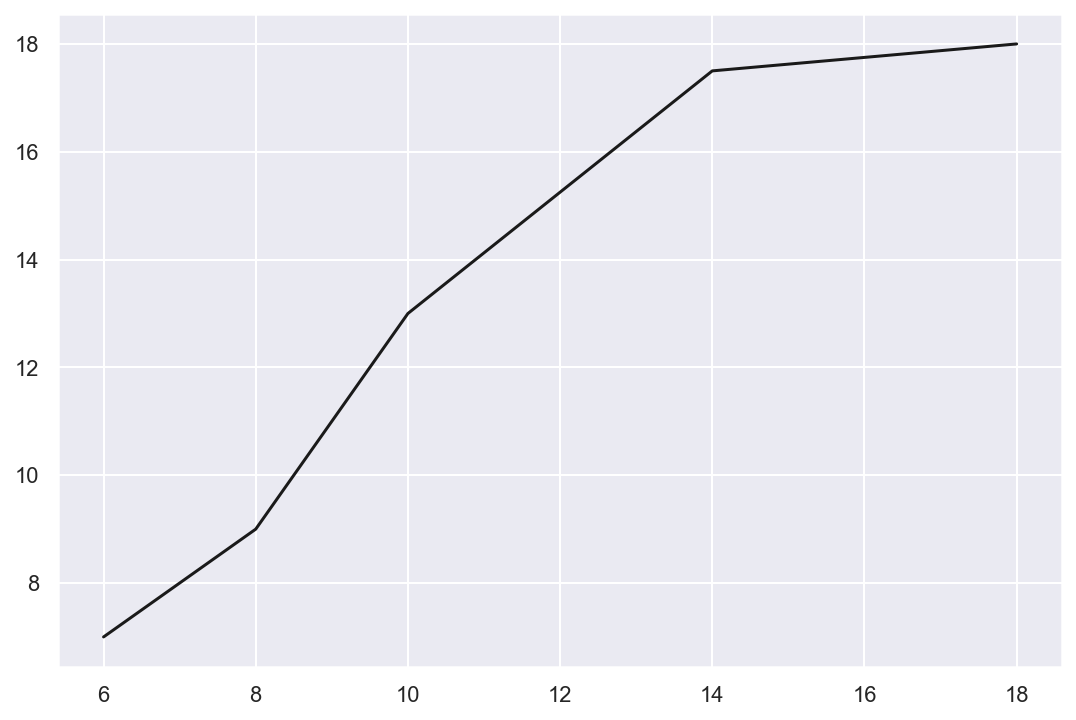

In [377]:
import matplotlib.pyplot as plt
plt.plot(df['x'], df['y'], 'k') # x = pizza diameter, y = price

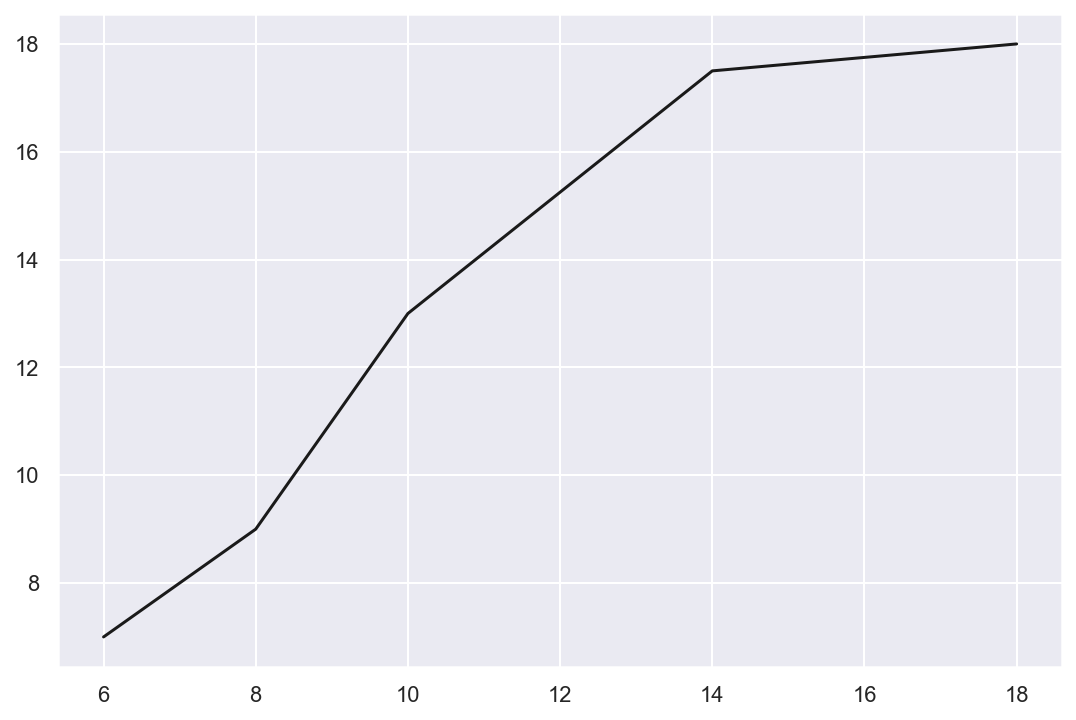

In [376]:
# alternatiuve way of plotting the same graph
x1= [[6],[8],[10],[14],[18]]
y1 = [[7],[9],[13],[17.5],[18]]
plt.plot(x1,y1,'k')

In [380]:
# Create and fit the model 
x = df['x'].values.reshape(-1,1)
y = df['y'].values

import numpy as np

model = LinearRegression()
# fitting the model,  the intercept and slope are parameters of the model that are learnt
# this is know as ordinary least square regression using training data to produce best fitting model
model.fit(x, y) 
# here after fitting the model, we are predicting the pricce of a 12 inch diameter pizza
y_pred =    model.predict([[12]])
print(y_pred)

[13.68103448]


# Evaluating the model fit
 we could have several regression lines meaning there are several sets of parameters
 we need to assess which regression lines(parameters produces the best fitting line)
 The difference between the observed and predicted values on the training data is called residuals orn training errors
 the difference between the predicted and observed values on the test data is called prediction or test errors
 The cost function oif loss function models this errors

In [381]:
# the residuals sum of squares could be calculated analytically like so
residuals_sum_squared = np.mean((model.predict(x)- y)**2)   # this is our cost function
residuals_sum_squared 

1.7495689655172406

# using numpy to calculate variance

varianve measres how a set of values are spread out
if all numbers are equal, the variance is set  to zero
small variance indicates that the numbers are near to the mean

In [382]:
import numpy as np
print(np.var(df['x'],ddof = 1)) ##ddof parameter set basels correction for variance

23.2


# covariance
this measures how to variables change together
if both increases, then the cov is positive
if there is no linear relationship between two variables, then the covariance will be zero-- the variables are linearlly uncorrelated, but not  necessary independent


In [383]:
import numpy as np
print(np.cov(df['x'],df['y'])[0][1])

22.650000000000002


In [388]:
# we can then solve for beta after caocluating the variance of iv and the COV of the IV and DV
# beta = cov(x,y)/var(x)
beta =   22.2/23.3
print(beta)

0.9527896995708154


In [392]:
ybar = df['y'].mean()
ybar

12.9

In [393]:
xbar =- df['x'].mean()
xbar

-11.2

In [403]:
# calculate intercept
alpha = (ybar + beta*(xbar))
alpha

# we now have values for alpha(intercept) and slope(beta) that minimizes the cost function whicg can be used to m make predictions



2.2287553648068688

# R squared
 This measures how well the observed values of the model are predicted by the model
 R squared is also the proportion of the variance of the response variable that is explained by the model. we generraly want  high R squared value( value of 1 is best)
    

In [211]:
# we use the model.score from sklearn to calcuate R squared
R_squared = model.score(x,y)
R_squared

0.9100015964240102

In [407]:
# the parameter, beta can aklso be solved like so
#from numpy.linalg import inv
#from numpy import dot, transpose
#dot(inv(transpose(df['x']), df['x'])), dot(tranpose(df['x'],df['y']))
     

# GRADIENT DESCENT
THIS IS ANOTHER METHOD TO FIND THE OPTIMAL VALUES OF MODELS PARAMETERS. THIS METHOD STILL FINDS THE BEST VALUE THAT MINIMIZES THE COST FUNCION




# REGRESSION USING THE GAPMINDER DATA SET


In [246]:
gap = pd. read_csv('/Users/uczhn/Documents/AZURE_DATA_SCIENCE_PYTHON/Data/gapminder.csv')
gap


,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...,...
1699,1700,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,1701,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,1702,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,1703,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# In scikit learn, data must be prepared to create arrays of features and target variable

# create arrays for features and target


In [285]:
# creating a small data set to follow on tutorial

x= [6,8,10,14,18,24,22,23,44,55]
y = [7,9,13,17.5,18,19,24,25,23]
z = [23,39,33,55,44,40,28,38,35]
p = [0.2,0.4,0.5,0.7,1.2,1.5,1.8,1.4,2.2]
dataset = list(zip(x, y,z,p))
df = pd.DataFrame(data=dataset, columns=['year','income','age','co2'])
df

,year,income,age,co2
0,6,7.0,23,0.2
1,8,9.0,39,0.4
2,10,13.0,33,0.5
3,14,17.5,55,0.7
4,18,18.0,44,1.2
5,24,19.0,40,1.5
6,22,24.0,28,1.8
7,23,25.0,38,1.4
8,44,23.0,35,2.2


In [286]:

import numpy as np
import pandas as pd


# Create arrays for features and target variable
y = df['income'].values
X_year = df['year'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_year.shape))

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X_year.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping: (9,)
Dimensions of X before reshaping: (9,)
Dimensions of y after reshaping:  (9, 1)
Dimensions of X after reshaping:  (9, 1)


 # next produce heat map to show the correlation of each feacture with the outcoma variable

# Fit and Prdict a linear model

In [287]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
x_year = df['year'].values.reshape(-1,1)
y = df['income'].values

0.9100015964240102


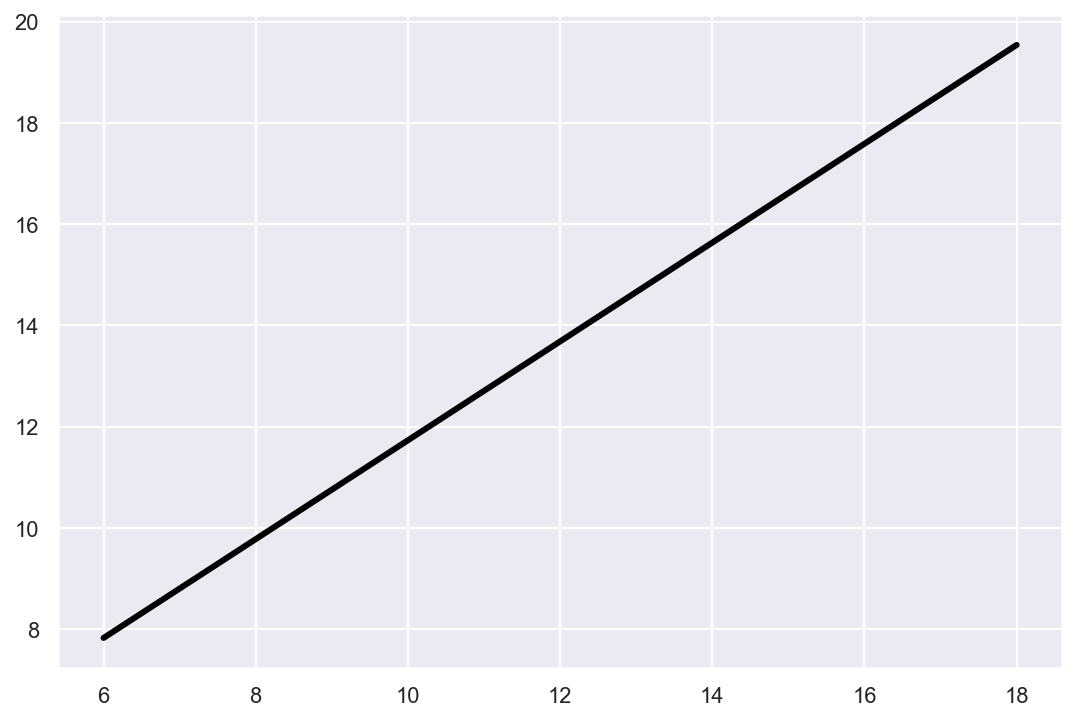

In [228]:
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(x_year), max(x_year))

# Fit the model to the data
reg.fit(x_year, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(x_year, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df['year'].values.reshape(-1,1)
y = df['income'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE- these are commonly used matrices for evaluating regresion models
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# generally, using more features will improved the model score. 
# This makes sense, as the model has more information to learn from.

R^2: 0.5558326142768424
Root Mean Squared Error: 4.398403942890065


# CROSS VALIDATION

R squared performed on test data my not truely represent the models ability to generalise on unseen data
cross validation sort of overcome this problem of your models performance being dependent on the train test spilt which may be arbitrary
By default, scikit-learn's cross_val_score() function uses  as the metric of choice for regression

In [292]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

X = df['year'].values.reshape(-1,1)
y = df['income'].values.reshape(-1,1)

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
%timeit cv_scores = cross_val_score(reg, X, y, cv=5) # %timeit here can be omoitted, it simply returns a time of how long the cross validadtion occurs

# Print the 5-fold cross-validation scores
print(cv_scores) # this are the five matrices(R squared values) for each fold

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores))) # this prints the average value frrom the 5 matrices above


3.52 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[-0.04056087  0.00446822 -0.03053247 -0.00136685 -0.01537603]
Average 5-Fold CV Score: -0.016673598824849


# REGULARISATION - LASSO REGRESSION  OR RIDGE REGRESSION

regularisation minimises the loss function to choose the best coefficients
a data set with many features will estimate a coeffient of each feature resulting to large coefficients for the model
and leads to overfitting
RELULARISATION  alters the loss function to penalise for large coefficients. large values for alpha will mean that the model is over penalised and can results to over fitting instead

selecting the best value for this parameter is called hyperparamneter tuning

Lasso regression could be use to selected out the feature that is  most important for predicting an outcome 
Its ability to perform feature selection in useful when dealing with data involving thousands of features. lasso regression shrinks the coefficients of less important variables to zero


# lasso regression used for feature selection
it shows that co2 is the highest predictor of income and year is least predictive

[-0.17859086  0.14607906 10.92898095]


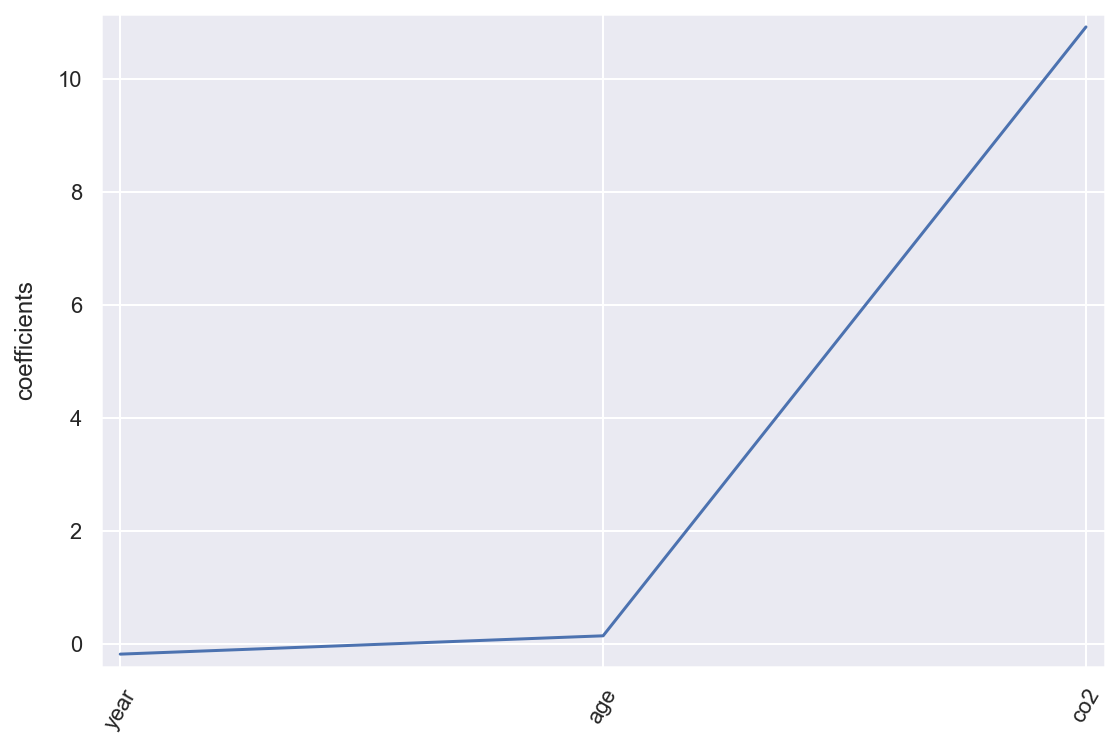

In [332]:
# Import Lasso
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

names = df.drop('income', axis = 1).columns # extract the name of the features
# Create arrays for features and target variable
y = df['income'].values.reshape(-1, 1)
X = df[['year','age','co2']]  # when you have more that one feature, you dont have to use .values.reshape()


lasso = Lasso(alpha=0.1)

# Fit the regressor to the data
lasso.fit(X, y)
# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
#lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names.values, rotation=60)
plt.ylabel('coefficients')
plt.margins(0.02)
plt.show()

# this shows that, co2 is the highest predictor of income

# RIDGE REGRESSION

here the task is to find the best alpha parameter for which the models performance is best
if alpha = 0, this reverts to normal regression and if too large, it leads to overfitting as model predicts literally everything
the alpha is a pernalisation parameter for very large coefficients
#
 we normally fit model on the train and test on the testdataset


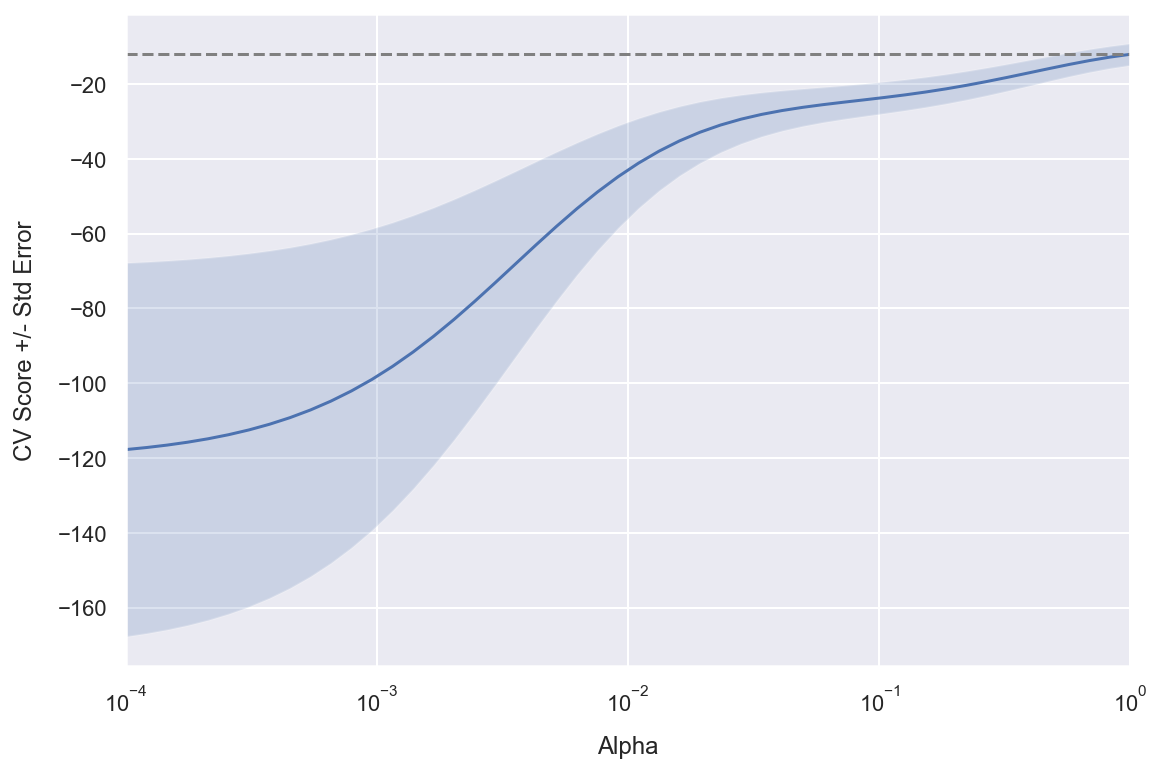

In [370]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# task: fitting ridge regression models over a range of different alphas

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50) # alphas from -4 to 0, up to 50numbers
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 4-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=4)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot

# plot cross-validated  Rsquared scores for each, using the 
# function defined below

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

display_plot(ridge_scores, ridge_scores_std)

In [358]:
# Notice how the cross-validation scores change with different 
# alphas. Which alpha should you pick? How can you fine-tune your model?

[1.00000000e-04 3.72759372e-04 1.38949549e-03 5.17947468e-03
 1.93069773e-02 7.19685673e-02 2.68269580e-01 1.00000000e+00]
